In [1]:
# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [5]:
X = np.load('/home/ubuntu/SDL/kmy/chunks_160x160_NORMvsDISTRESS_50k_test_chunk_1_x.npy')
Y= np.load('/home/ubuntu/SDL/kmy/chunks_160x160_NORMvsDISTRESS_50k_test_chunk_1_y.npy')
print(np.shape(Y[0]))
print('X_shape:',np.shape(X[0]),'Y_shape:',np.shape(Y[0]))
print('X_list shape:',np.shape(X),'Y_list shape:',np.shape(Y))

()
X_shape: (1, 160, 160) Y_shape: ()
X_list shape: (4880, 1, 160, 160) Y_list shape: (4880,)


In [6]:
import sklearn
from sklearn.model_selection import train_test_split

# Train set, Test set으로 나누기 
train_images, val_images, train_labels, val_labels = train_test_split(X,Y, test_size=0.2, random_state=1,shuffle=True)


print(np.shape(train_images),np.shape(val_images))
print(np.shape(train_labels),np.shape(val_labels))

(3904, 1, 160, 160) (976, 1, 160, 160)
(3904,) (976,)


In [7]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [8]:
print(tf.__version__)     # 텐서플로우 버전확인 (colab의 기본버전은 1.15.0) --> 2.0 변경 "%tensorflow_version 2.x"
print(keras.__version__)

1.15.2
2.2.4-tf


In [44]:
learning_rate = 0.001  # 러닝레이트 
training_epochs = 100  # 에폭
batch_size = 32       # 배치사이즈


In [45]:
def create_model():
    inputs = keras.Input(shape=(1, 160,160))
    conv1 = keras.layers.Conv2D(filters=32, kernel_size=3, padding='SAME', activation=tf.nn.relu)(inputs) 
    pool1 = keras.layers.MaxPool2D(padding='SAME')(conv1)
    conv2 = keras.layers.Conv2D(filters=64, kernel_size=3, padding='SAME', activation=tf.nn.relu)(pool1)
    pool2 = keras.layers.MaxPool2D(padding='SAME')(conv2)
    conv3 = keras.layers.Conv2D(filters=128, kernel_size=3, padding='SAME', activation=tf.nn.relu)(pool2)
    pool3 = keras.layers.MaxPool2D(padding='SAME')(conv3)
    pool3_flat = keras.layers.Flatten()(pool3)
    dense4 = keras.layers.Dense(units=256, activation=tf.nn.relu)(pool3_flat)
    logits = keras.layers.Dense(units=7,activation='softmax')(dense4) 
    return keras.Model(inputs=inputs, outputs=logits)


In [46]:
model= create_model()
model.summary() # 모델에 대한 요약 출력해줌

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 1, 160, 160)]     0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 1, 160, 32)        46112     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 1, 80, 32)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 1, 80, 64)         18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 1, 40, 64)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 1, 40, 128)        73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 1, 20, 128)        0   

In [47]:
import keras.backend as K

# CNN 모델 구조 확정하고 컴파일 진행
model.compile( loss='sparse_categorical_crossentropy',  
              optimizer='adam',               
              metrics=['accuracy'])    
# 학습실행

model.fit(train_images, train_labels, 
          batch_size=batch_size, 
          epochs=training_epochs, 
          verbose=1,                 # verbose는 학습 중 출력되는 문구를 설정하는 것 
         validation_data=(val_images, val_labels)) # test를 val로 사용

score = model.evaluate(val_images, val_labels, verbose=0) # test 값 결과 확인
print('val loss :', score[0])

Train on 3904 samples, validate on 976 samples
Epoch 1/100
3904/3904 [==============================] - 1s 223us/sample - loss: 0.6486 - acc: 0.6678 - val_loss: 0.5232 - val_acc: 0.7664
Epoch 2/100
3904/3904 [==============================] - 1s 157us/sample - loss: 0.5056 - acc: 0.7713 - val_loss: 0.4869 - val_acc: 0.7818
Epoch 3/100
3904/3904 [==============================] - 1s 158us/sample - loss: 0.4707 - acc: 0.7836 - val_loss: 0.4862 - val_acc: 0.7920
Epoch 4/100
3904/3904 [==============================] - 1s 154us/sample - loss: 0.4254 - acc: 0.8079 - val_loss: 0.4553 - val_acc: 0.8023
Epoch 5/100
3904/3904 [==============================] - 1s 154us/sample - loss: 0.4018 - acc: 0.8225 - val_loss: 0.4346 - val_acc: 0.8258
Epoch 6/100
3904/3904 [==============================] - 1s 150us/sample - loss: 0.3870 - acc: 0.8258 - val_loss: 0.4718 - val_acc: 0.7879
Epoch 7/100
3904/3904 [==============================] - 1s 153us/sample - loss: 0.3638 - acc: 0.8402 - val_loss: 0.492

3904/3904 [==============================] - 1s 157us/sample - loss: 0.0192 - acc: 0.9939 - val_loss: 1.4129 - val_acc: 0.8217
Epoch 60/100
3904/3904 [==============================] - 1s 149us/sample - loss: 0.0054 - acc: 0.9987 - val_loss: 1.5729 - val_acc: 0.8248
Epoch 61/100
3904/3904 [==============================] - 1s 160us/sample - loss: 0.0024 - acc: 0.9992 - val_loss: 1.6362 - val_acc: 0.8330
Epoch 62/100
3904/3904 [==============================] - 1s 152us/sample - loss: 0.0051 - acc: 0.9985 - val_loss: 1.6645 - val_acc: 0.8094
Epoch 63/100
3904/3904 [==============================] - 1s 147us/sample - loss: 0.0391 - acc: 0.9854 - val_loss: 1.3506 - val_acc: 0.8043
Epoch 64/100
3904/3904 [==============================] - 1s 156us/sample - loss: 0.0296 - acc: 0.9890 - val_loss: 1.6062 - val_acc: 0.8053
Epoch 65/100
3904/3904 [==============================] - 1s 155us/sample - loss: 0.0250 - acc: 0.9915 - val_loss: 1.5057 - val_acc: 0.8176
Epoch 66/100
3904/3904 [=========

In [20]:
predictions = model.predict(val_images)
predictions[0]

array([9.9991155e-01, 8.8394314e-05, 5.0154144e-18, 5.6626936e-18,
       3.4742880e-18, 3.0678737e-18, 8.4657924e-18], dtype=float32)

In [21]:
np.argmax(predictions[0])

0

In [22]:
val_labels[0]

0

In [39]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(np.array(np.squeeze(img)),cmap='gray')
  
  predicted_label = np.argmax(predictions_array)
  real_label = np.argmax(true_label)
  if predicted_label == real_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                real_label),
                                color=color)

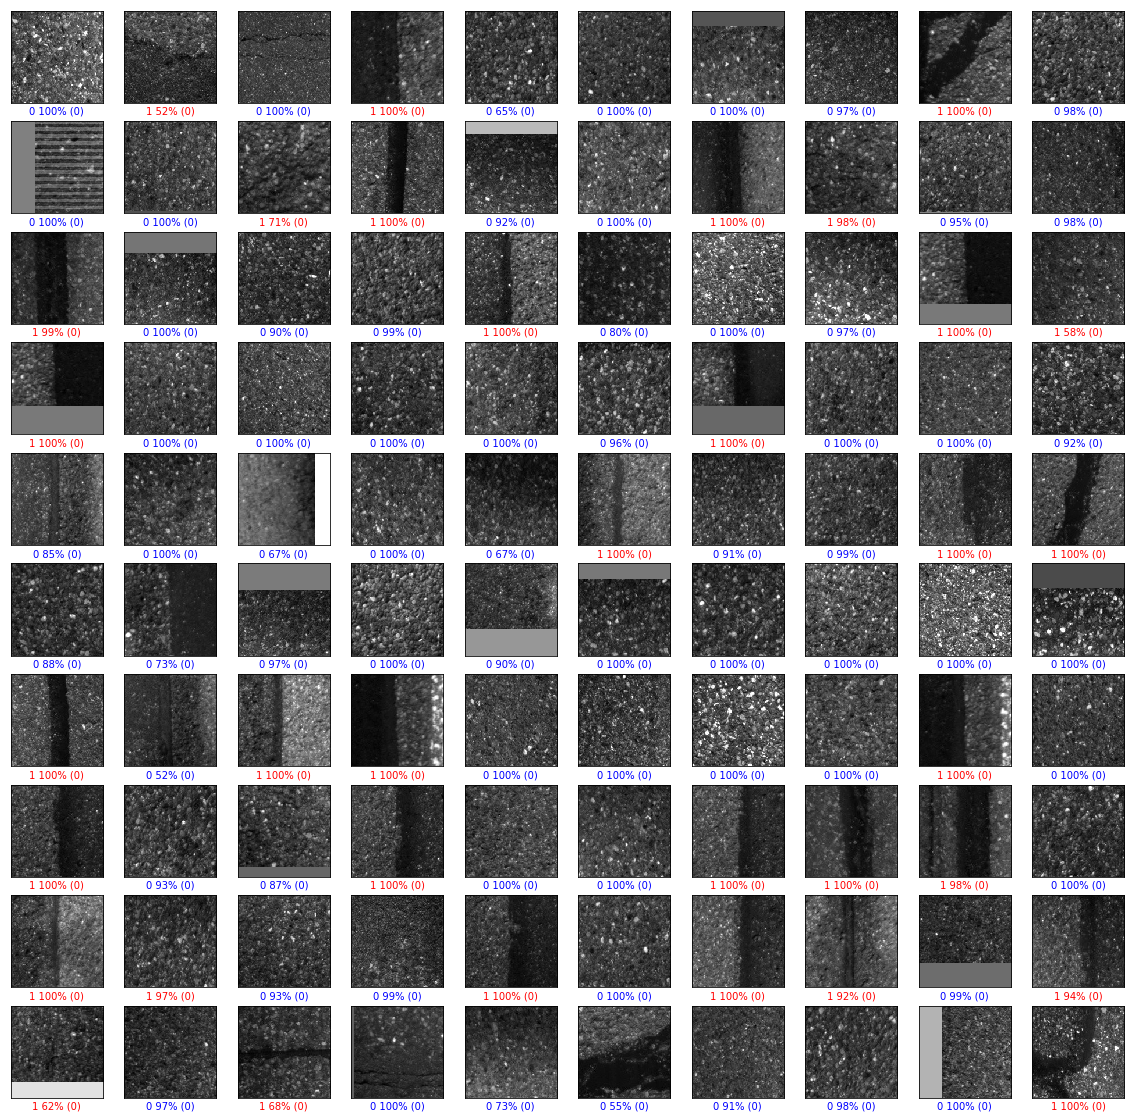

In [42]:
num_rows = 10
num_cols = 10
num_images = num_rows*num_cols
plt.figure(figsize=(2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, num_cols, i+1)
  plot_image(i, predictions, val_labels, val_images)
 # plt.subplot(num_rows, 2*num_cols, 2*i+2)
 # plot_value_array(i, predictions, test_labels)
plt.show()